In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:10<00:00, 63.0MB/s]
100% 1.06G/1.06G [00:10<00:00, 105MB/s] 


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [23]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Gennerators are use to process large amount of data. it makes the batches of the data to proceess it in the ram. At same time 1 batch will be process at a same time
#These generators are provided by keras.

In [6]:
#GENERATORS
train_ds= keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

test_ds= keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
#Normalize (make the pixels of the image 0 and 1 rather the image size is from 0-255)
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

#map function is use to take 1 image from train_ds to take the labels and give it to the function. at the end function will do
#transfarmation and the me store it again in the train_ds and test_ds
train_ds=train_ds.map(process)
test_ds=test_ds.map(process)

In [24]:
#creating CNN

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3))) #this is convoluation layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')) #this is pooling layer

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))

model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [26]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
history= model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 [==============================] - 70s 106ms/step - loss: 1.3713 - accuracy: 0.5777 - val_loss: 0.6834 - val_accuracy: 0.6340
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5884 - accuracy: 0.6926 - val_loss: 0.6380 - val_accuracy: 0.6574
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4954 - accuracy: 0.7631 - val_loss: 0.4880 - val_accuracy: 0.7616
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4372 - accuracy: 0.7994 - val_loss: 0.5079 - val_accuracy: 0.7542
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3711 - accuracy: 0.8356 - val_loss: 0.5686 - val_accuracy: 0.7260
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3001 - accuracy: 0.8704 - val_loss: 0.6075 - val_accuracy: 0.7786
Epoch 7/10
625/625 [==============================] - 64s 103ms/step - loss: 0.2198 - accuracy: 0.9086 - val_loss: 0.6484 - val_ac

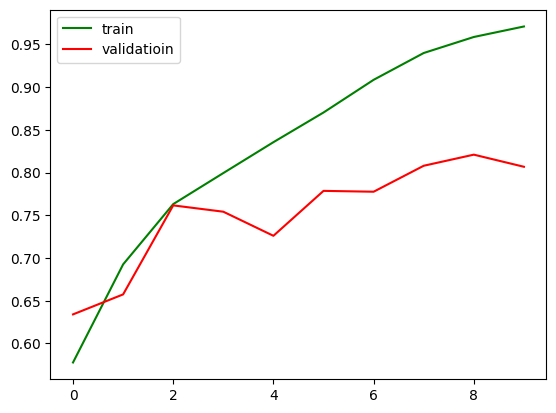

In [28]:
#visualization

plt.plot(history.history['accuracy'], color='green', label='train')
plt.plot(history.history['val_accuracy'], color='red', label='validatioin')
plt.legend()
plt.show()

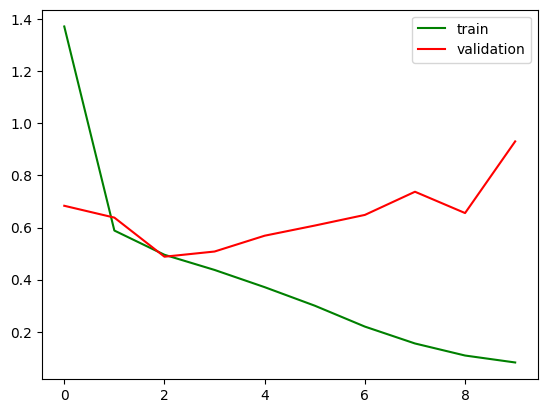

In [29]:
plt.plot(history.history['loss'], color = 'green', label='train')
plt.plot(history.history['val_loss'], color='red', label='validation')
plt.legend()
plt.show()

In [30]:
import cv2

In [37]:
cat_image= cv2.imread('/content/cat.jpg')

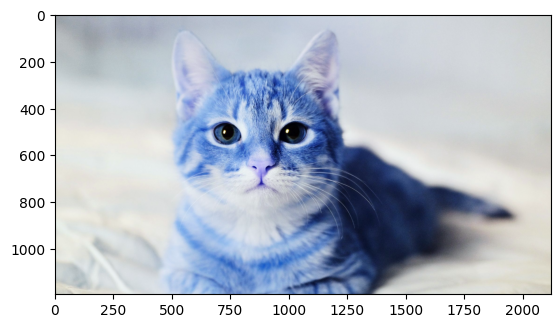

In [38]:
plt.imshow(cat_image)

In [39]:
cat_image.shape

(1194, 2121, 3)

In [40]:
test_image=cv2.resize(cat_image,(256,256))

In [42]:
test_input=test_image.reshape((1,256,256,3))

In [43]:
model.predict(test_input)

1/1 [==============================] - 0s 20ms/step


array([[0.]], dtype=float32)

In [44]:
dog_image= cv2.imread('/content/dog.jpg')

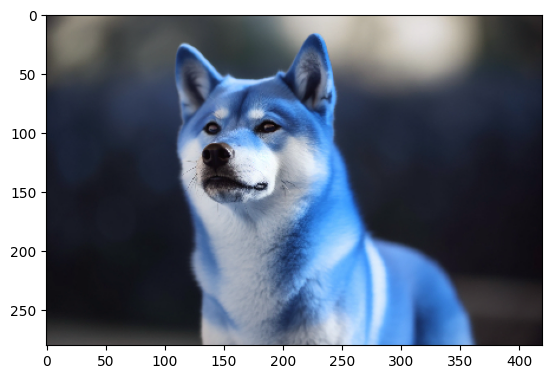

In [45]:
plt.imshow(dog_image)

In [46]:
dog_image.shape

(280, 420, 3)

In [47]:
test_image=cv2.resize(dog_image,(256,256))

In [48]:
test_input=test_image.reshape((1,256,256,3))

In [50]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)